#### Steps in EDA
	1. Data Ingestion
	2. Perform basic data quality checks
		Missing Value treatment
	3. Perform descriptive statistics
	4. Data Visualization
		Univariate - Single column visualization
			categorical features - Countplot
			continuous features - histogram
		Bivariate - two columns
			continuous vs continuous -> scatterplot, regplot
			categorical vs con -> boxplot
			categorical vs categorical -> crosstab heatmap
		Multivariate - multiple columns
			correlation plot
			pairplot

##### <b>`NIT Engineering college Details`

Name, Established Year, NIRF, State, Min Cutoff Rank, Max Cutoff Rank, Course Total Fees, Placement Max Package, Placement Avg Package

In [109]:
# Step-1 Data Ingestion
import pandas as pd
df = pd.read_csv('nit-college-details.csv')
df.tail(3)


,Name,Abbreviation,Founded,Established as NIT,City/Town,State/UT,NIRF_Engineering_Rank,NIRF Rank_Overall,Region,Years_Old
28,NIT Sikkim,NITSKM,2010,2010,Ravangla,Sikkim,0,0,NorthEast,16
29,NIT Uttarakhand,NITUK,2010,2010,"Srinagar, Uttarakhand",Uttarakhand,0,0,North,16
30,NIT Andhra Pradesh,NITANP,2015,2015,Tadepalligudem,Andhra Pradesh,0,0,South,11


In [110]:
# Step-2: Data Sanity - Check for duplicates, null
duplicates_count = df.duplicated().sum()
if duplicates_count > 0:
    print("Duplicates Exist.")
    df.drop_duplicates(keep='first').reset_index(drop=True)
    print('Duplicates Removed.')
else:
    print('Duplicates does not exist')

nulls = df.isna().sum()
nulls_cnt = nulls[nulls > 0].sum()
if nulls_cnt > 0:
    print("Nulls does not exist")
else:
    print('Nulls does not exist')

Duplicates does not exist
Nulls does not exist


In [ ]:
cat = list(df.columns[df.dtypes == "object"])
cat

['Name', 'Abbreviation', 'City/Town', 'State/UT', 'Region']

In [112]:
con = list(df.columns[df.dtypes != "object"])
con

['Founded',
 'Established as NIT',
 'NIRF_Engineering_Rank',
 'NIRF Rank_Overall',
 'Years_Old']

In [113]:
def replacer(df: pd.DataFrame):
    cat = list(df.columns[df.dtypes == "object"])    
    for col in df.columns:        
        if col in cat:
            mode = df[col].mode()[0]
            df[col] = df[col].fillna(mode)
        else:
            mean = df[col].mean()
            df[col] = df[col].fillna(mean)
    print("Missing values replaced")

In [114]:
replacer(df)

Missing values replaced


In [160]:
# Step-3: Perform descriptive statistics
cat, con

(['Name', 'Abbreviation', 'City/Town', 'State/UT', 'Region'],
 ['Founded',
  'Established as NIT',
  'NIRF_Engineering_Rank',
  'NIRF Rank_Overall',
  'Years_Old'])

In [161]:
df[con].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Founded,31.0,1974.32,36.26,1856.0,1960.0,1963.0,2010.0,2015.0
Established as NIT,31.0,2005.94,4.71,2002.0,2002.0,2002.0,2010.0,2019.0
NIRF_Engineering_Rank,31.0,40.77,35.04,0.0,0.0,44.0,69.5,99.0
NIRF Rank_Overall,31.0,12.55,25.44,0.0,0.0,0.0,0.0,86.0
Years_Old,31.0,51.68,36.26,11.0,16.0,63.0,66.0,170.0


In [162]:
df[cat].describe().T

,count,unique,top,freq
Name,31,31,NIT Karnataka,1
Abbreviation,31,31,NITK,1
City/Town,31,31,Surathkal,1
State/UT,31,30,West Bengal,2
Region,31,6,North,8


(Region
 North        8
 NorthEast    7
 South        6
 West         4
 East         4
 Central      2
 Name: count, dtype: int64,
 <Axes: xlabel='Region'>)

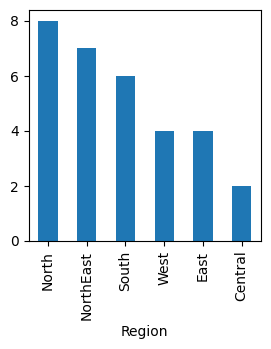

In [119]:
df['Region'].value_counts(), df['Region'].value_counts().plot(kind='bar', figsize=(3,3))

In [120]:
df['Name'].head(3).value_counts()

Name
NIT Karnataka    1
NIT Warangal     1
NIT Bhopal       1
Name: count, dtype: int64

In [121]:
df['State/UT'].tail(3).value_counts()

State/UT
Sikkim            1
Uttarakhand       1
Andhra Pradesh    1
Name: count, dtype: int64

In [122]:
# Step-4: Data Visualization
    # 1.Univariate - Single column visulization
    # 2.Bivariate - two column
    # 3.Multivariate - multiple columns
import matplotlib.pyplot as plt
import seaborn as sns

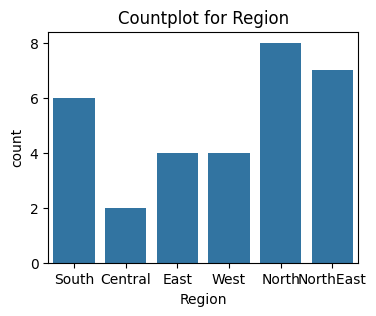

In [159]:
# Univariate analysis
    # 1. categorical features - Countplot
    # 2. continuous features - histogram

plt.figure(figsize=(4, 3)) # Set figure size (width, height)
sns.countplot(data=df, x="Region") # Plot Graph
plt.title("Countplot for Region") # Add Title
plt.show()


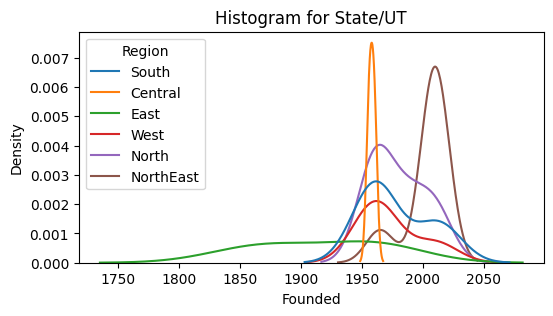

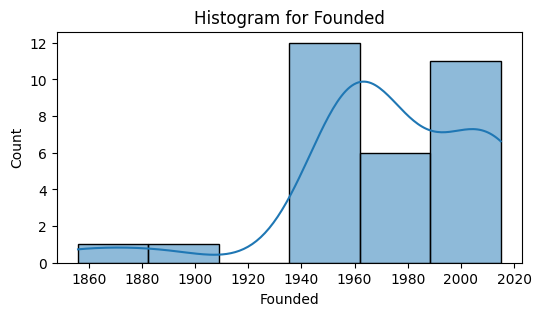

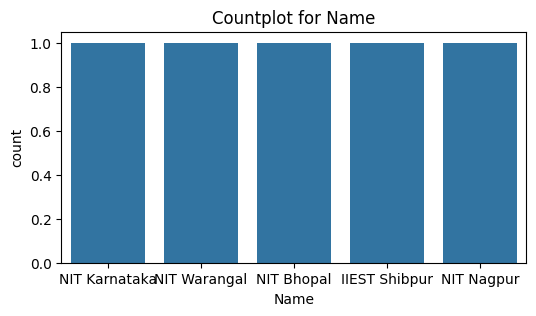

In [158]:
# Univariate Functions
def plot_count(df: pd.DataFrame, col: str):
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col)
    plt.title(f'Countplot for {col}')
    plt.show()

def plot_histogram(df: pd.DataFrame, col: str):
    plt.figure(figsize=(6,3))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram for {col}')
    plt.show()
plt.figure(figsize=(6,3))
sns.kdeplot(data=df, x='Founded', hue='Region')
plt.title('Histogram for State/UT')
plt.show()

for col in con:
    plot_histogram(df, col)
    break # Just breaking for one column

for col in cat:
    plot_count(df.head(5), col)
    break # Just breaking for one column

In [157]:
# Bivariate Analysis
    # Analyze two variables at a time
        # 1.continuous vs continuous -> scatterplot, regplot
        # 2.categorical vs continuous -> boxplot
        # 3.categorical vs categorical -> crosstab heatmap

# Bivariate functions
def plot_scatter(df: pd.DataFrame, x: str, y: str):
    plt.figure(figsize=(6,3))
    sns.regplot(data=df,x=x,y=y)
    plt.title(f"Scatterplot for {x} and {y}")
    plt.show()

def plot_reg(df: pd.DataFrame, x: str, y: str):
    plt.figure(figsize=(6,3))
    sns.regplot(data=df, x=x, y=y, line_kws={"color":"Red"})
    plt.title(f"Regplot for {x} and {y}")
    plt.show()

def plot_box(df: pd.DataFrame, x: str, y: str):
    plt.figure(figsize=(6,3))
    sns.boxplot(data=df, x=x, y=y)
    plt.title(f"Boxplot for {x} and {y}")
    plt.show()

con, cat

(['Founded',
  'Established as NIT',
  'NIRF_Engineering_Rank',
  'NIRF Rank_Overall',
  'Years_Old'],
 ['Name', 'Abbreviation', 'City/Town', 'State/UT', 'Region'])

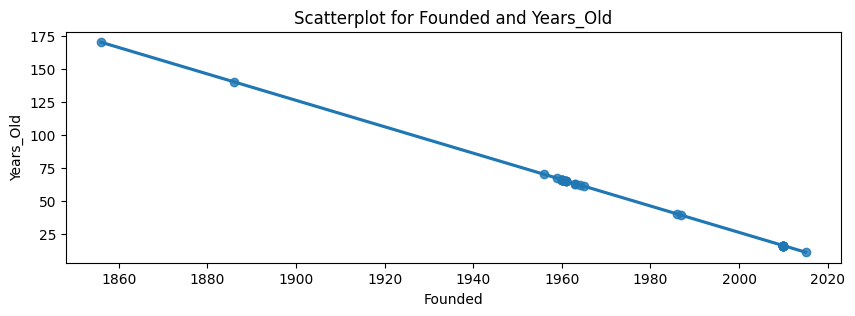

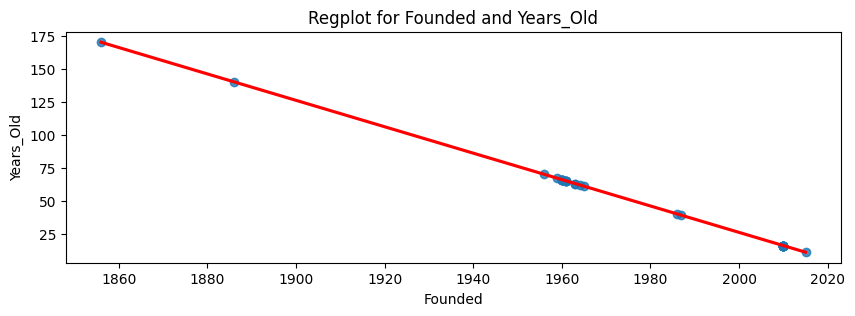

In [127]:
# 1.continuous vs continuous -> scatterplot, regplot
plot_scatter(df, 'Founded', 'Years_Old')
plot_reg(df, 'Founded', 'Years_Old')

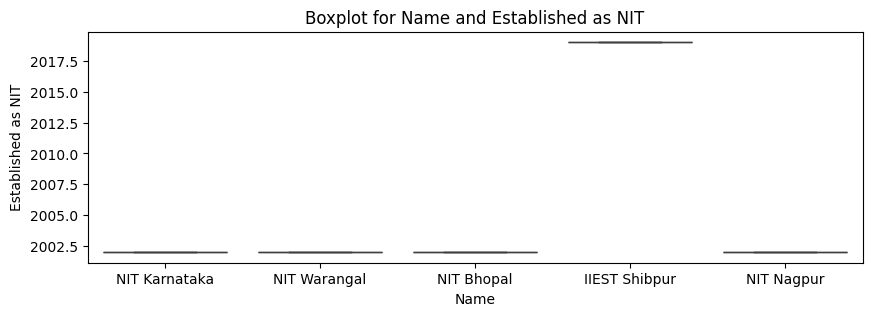

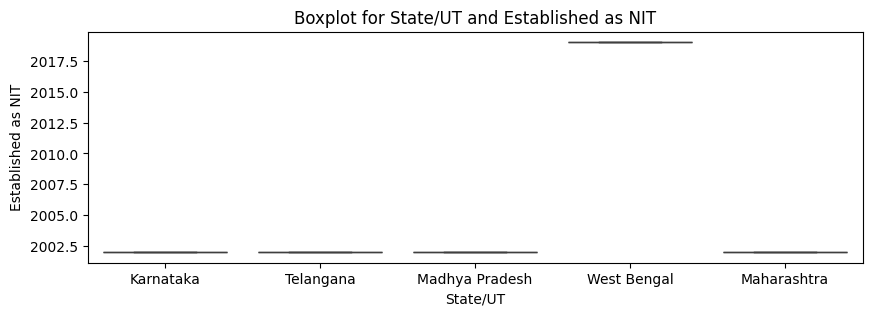

In [ ]:
# 2. categorical vs continuous -> boxplot
plot_box(df.head(5), 'Name', 'Established as NIT')
plot_box(df.head(5), 'State/UT', 'Established as NIT')

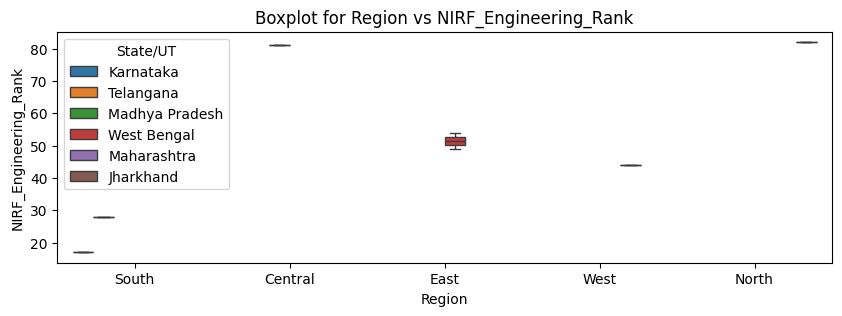

In [144]:
plt.figure(figsize=(10, 3))
sns.boxplot(data=df.head(7), x="Region", y="NIRF_Engineering_Rank", hue="State/UT")
plt.title("Boxplot for Region vs NIRF_Engineering_Rank")
plt.show()

In [145]:
unique = df[cat].nunique()
unique

Name            31
Abbreviation    31
City/Town       31
State/UT        30
Region           6
dtype: int64

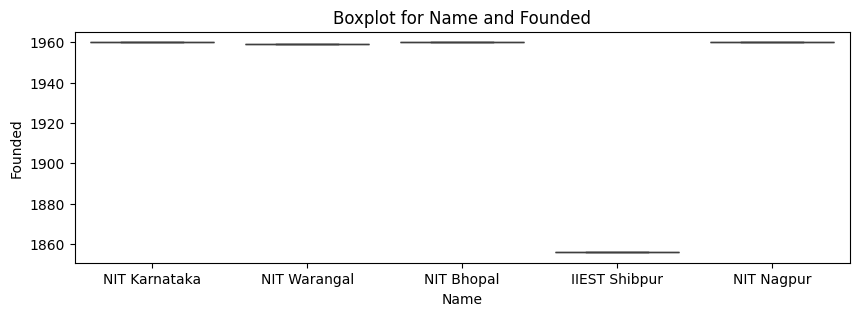

In [154]:
for col in cat:
    plot_box(df.head(5), col, 'Founded')
    break

In [155]:
# 3. categorical vs categoric > Crosstab heatmap

def crosstab_heatmap(df: pd.DataFrame, cat_col1: str, cat_col2: str):
    ctab = pd.crosstab(df[cat_col1], df[cat_col2])
    sns.heatmap(ctab, annot=True, fmt="d")
    plt.title(f"Crosstab Heatmap for {cat_col1} vs {cat_col2}")
    plt.show()

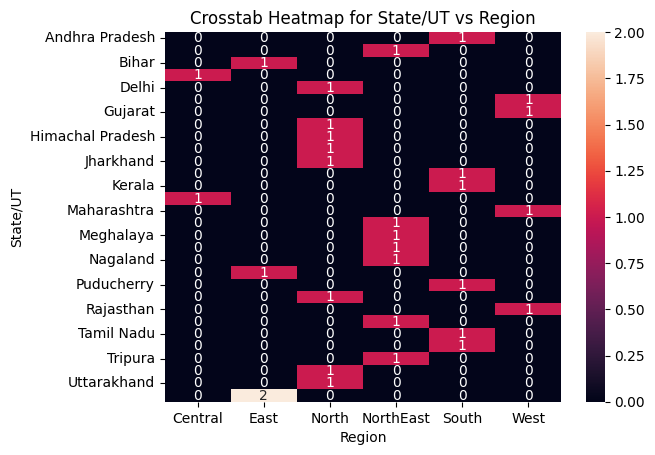

In [156]:
crosstab_heatmap(df, 'State/UT', 'Region')

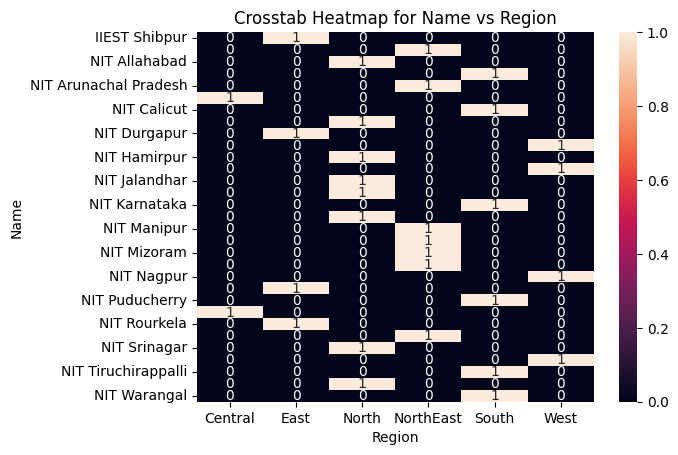

In [138]:
crosstab_heatmap(df, 'Name', 'Region')

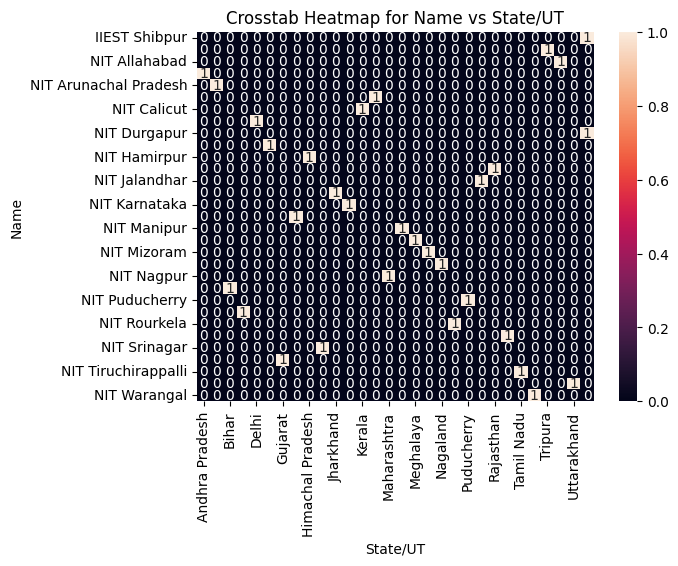

In [150]:
crosstab_heatmap(df, 'Name', 'State/UT')

In [139]:
# Multivariate analysis
    # 1.correlation plot
    # 2.pairplot

corr = df.corr(numeric_only=True)
corr

,Founded,Established as NIT,NIRF_Engineering_Rank,NIRF Rank_Overall,Years_Old
Founded,1.000000,0.177108,-0.290626,-0.188098,-1.000000
Established as NIT,0.177108,1.000000,-0.307812,-0.425837,-0.177108
NIRF_Engineering_Rank,-0.290626,-0.307812,1.000000,-0.168450,0.290626
NIRF Rank_Overall,-0.188098,-0.425837,-0.168450,1.000000,0.188098
Years_Old,-1.000000,-0.177108,0.290626,0.188098,1.000000


In [151]:
corr.loc["Founded", "Years_Old"]

np.float64(-0.9999999999999997)

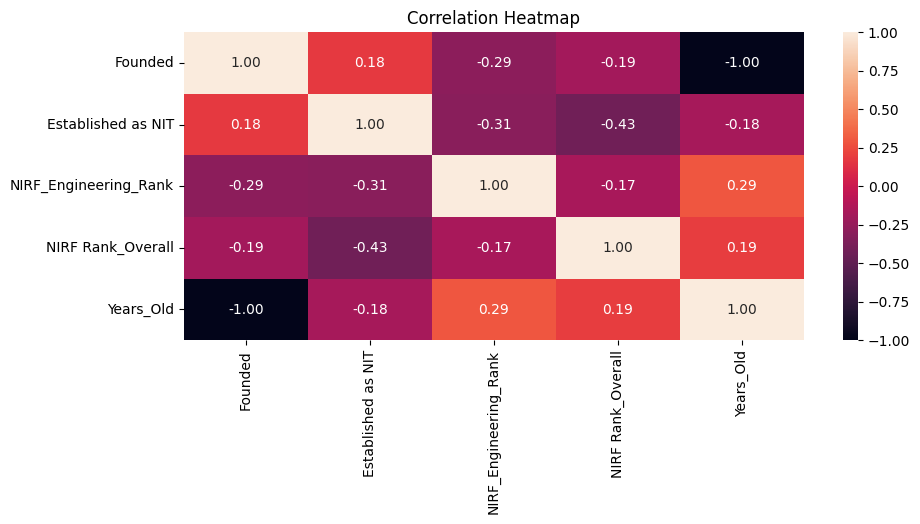

In [141]:
plt.figure(figsize=(10, 4))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

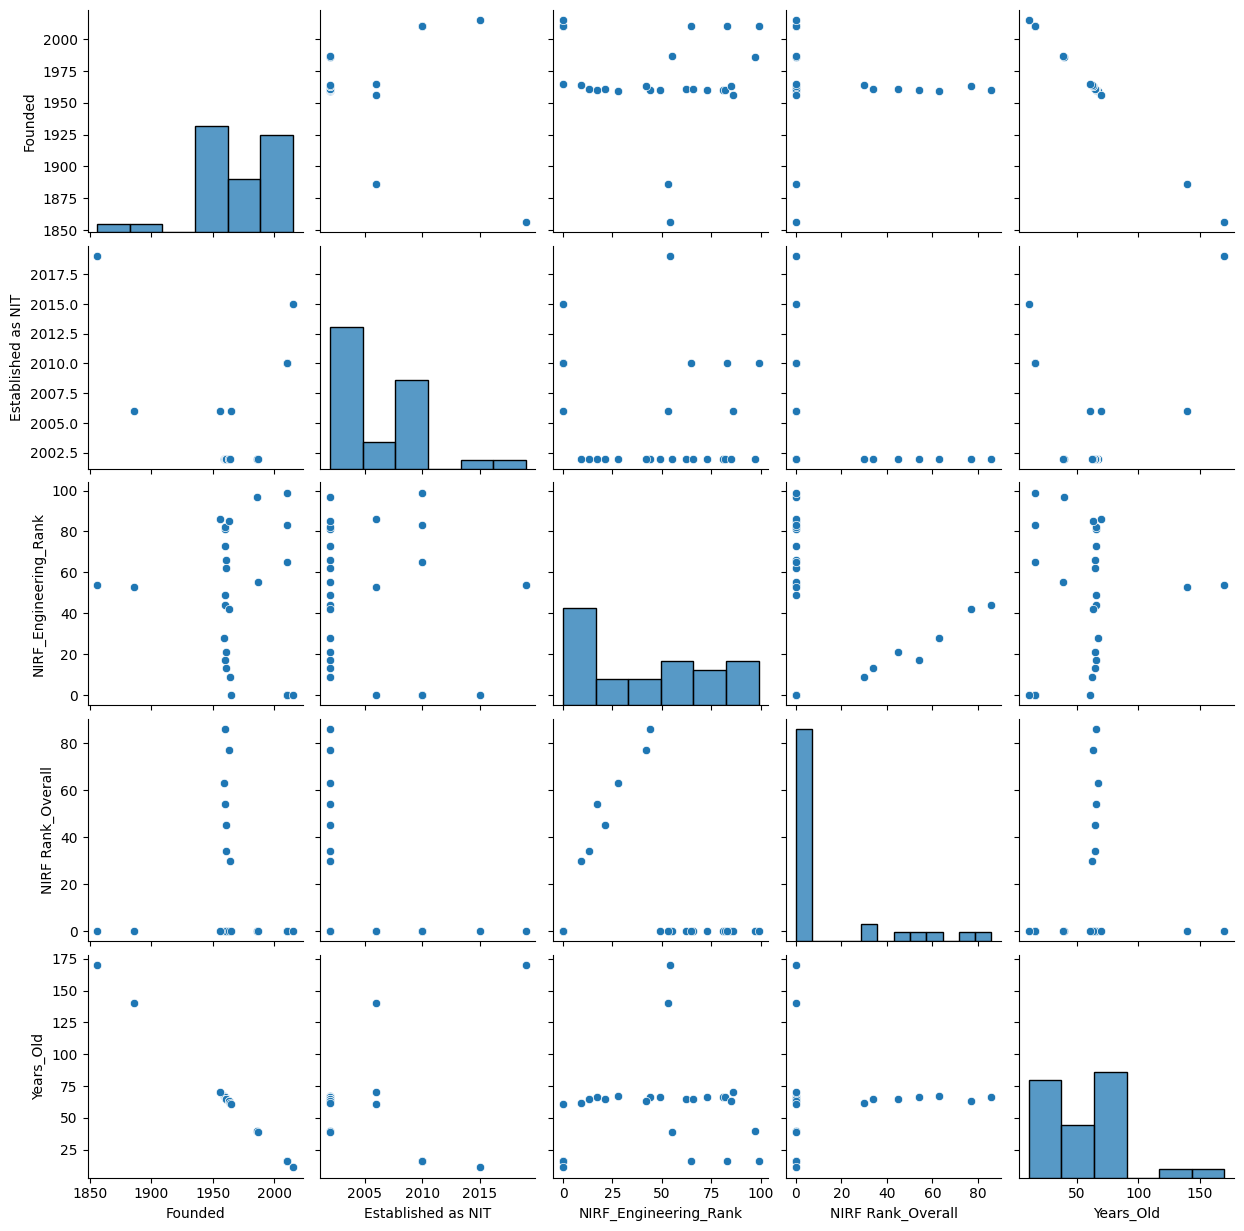

In [152]:
# Pair Plot
sns.pairplot(df[con])

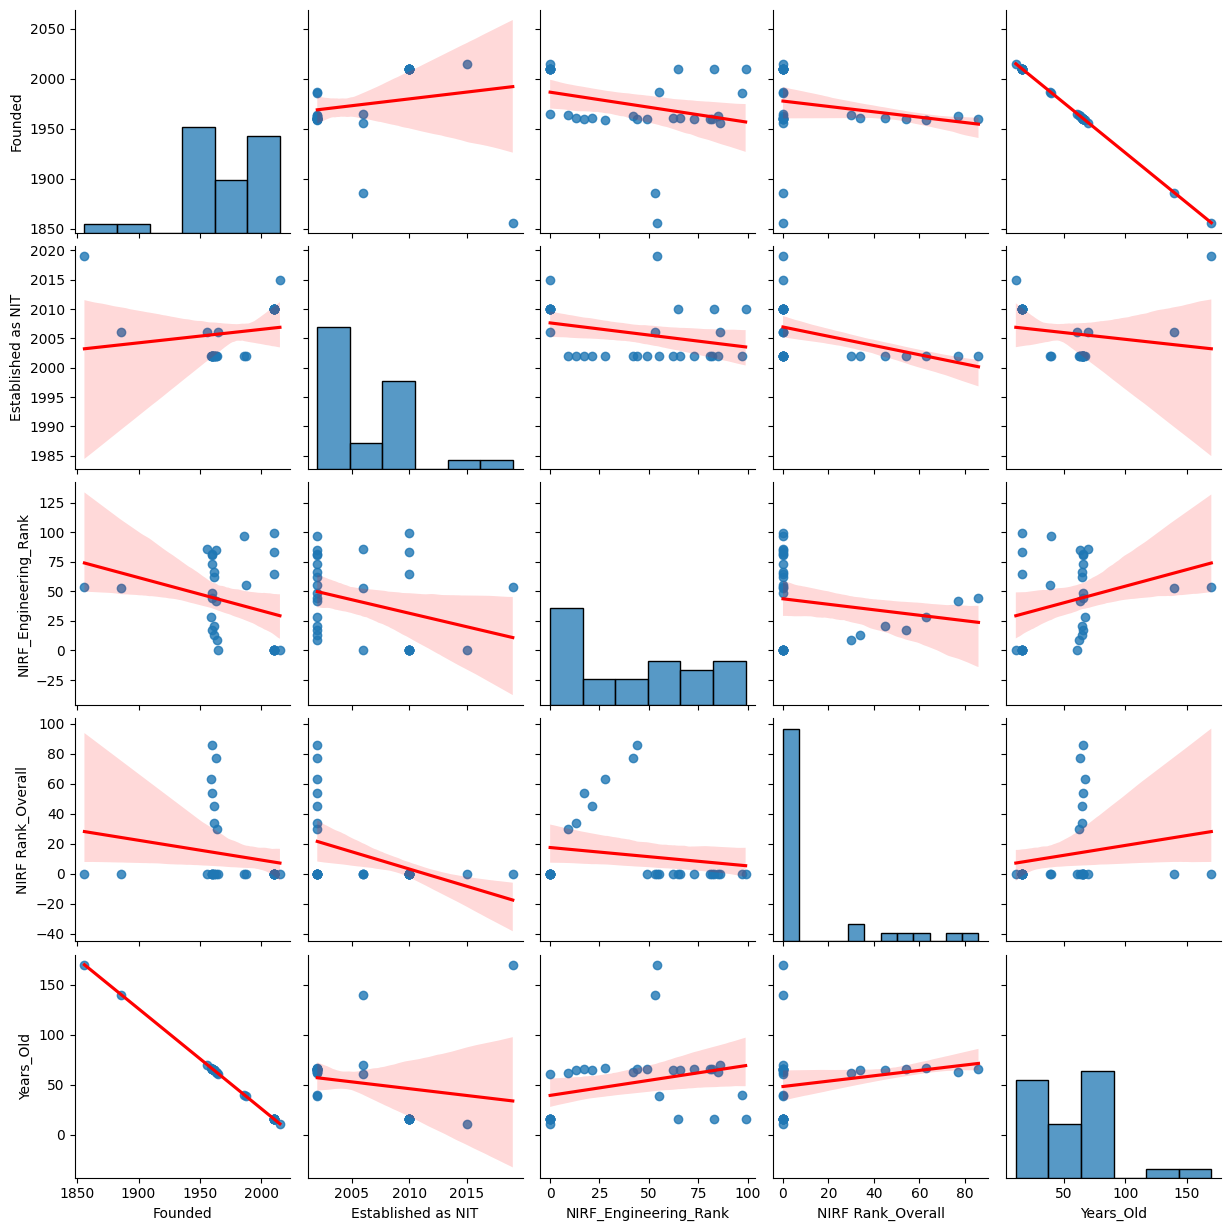

In [153]:
sns.pairplot(df[con], kind="reg", plot_kws = {"line_kws": {"color": "red"}})